In [102]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [103]:
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
print(data.shape)

(1338, 7)


In [105]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [106]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [107]:
temp_data = data.copy()

----

Выделим числовые признаки

In [108]:
types = temp_data.dtypes
num_feature = list(types[types != 'object'].index)
num_feature

['age', 'bmi', 'children', 'charges']

---

Построим гистограммы и диаграммы рассеяния с наложением линейной регрессии по целевому признаку

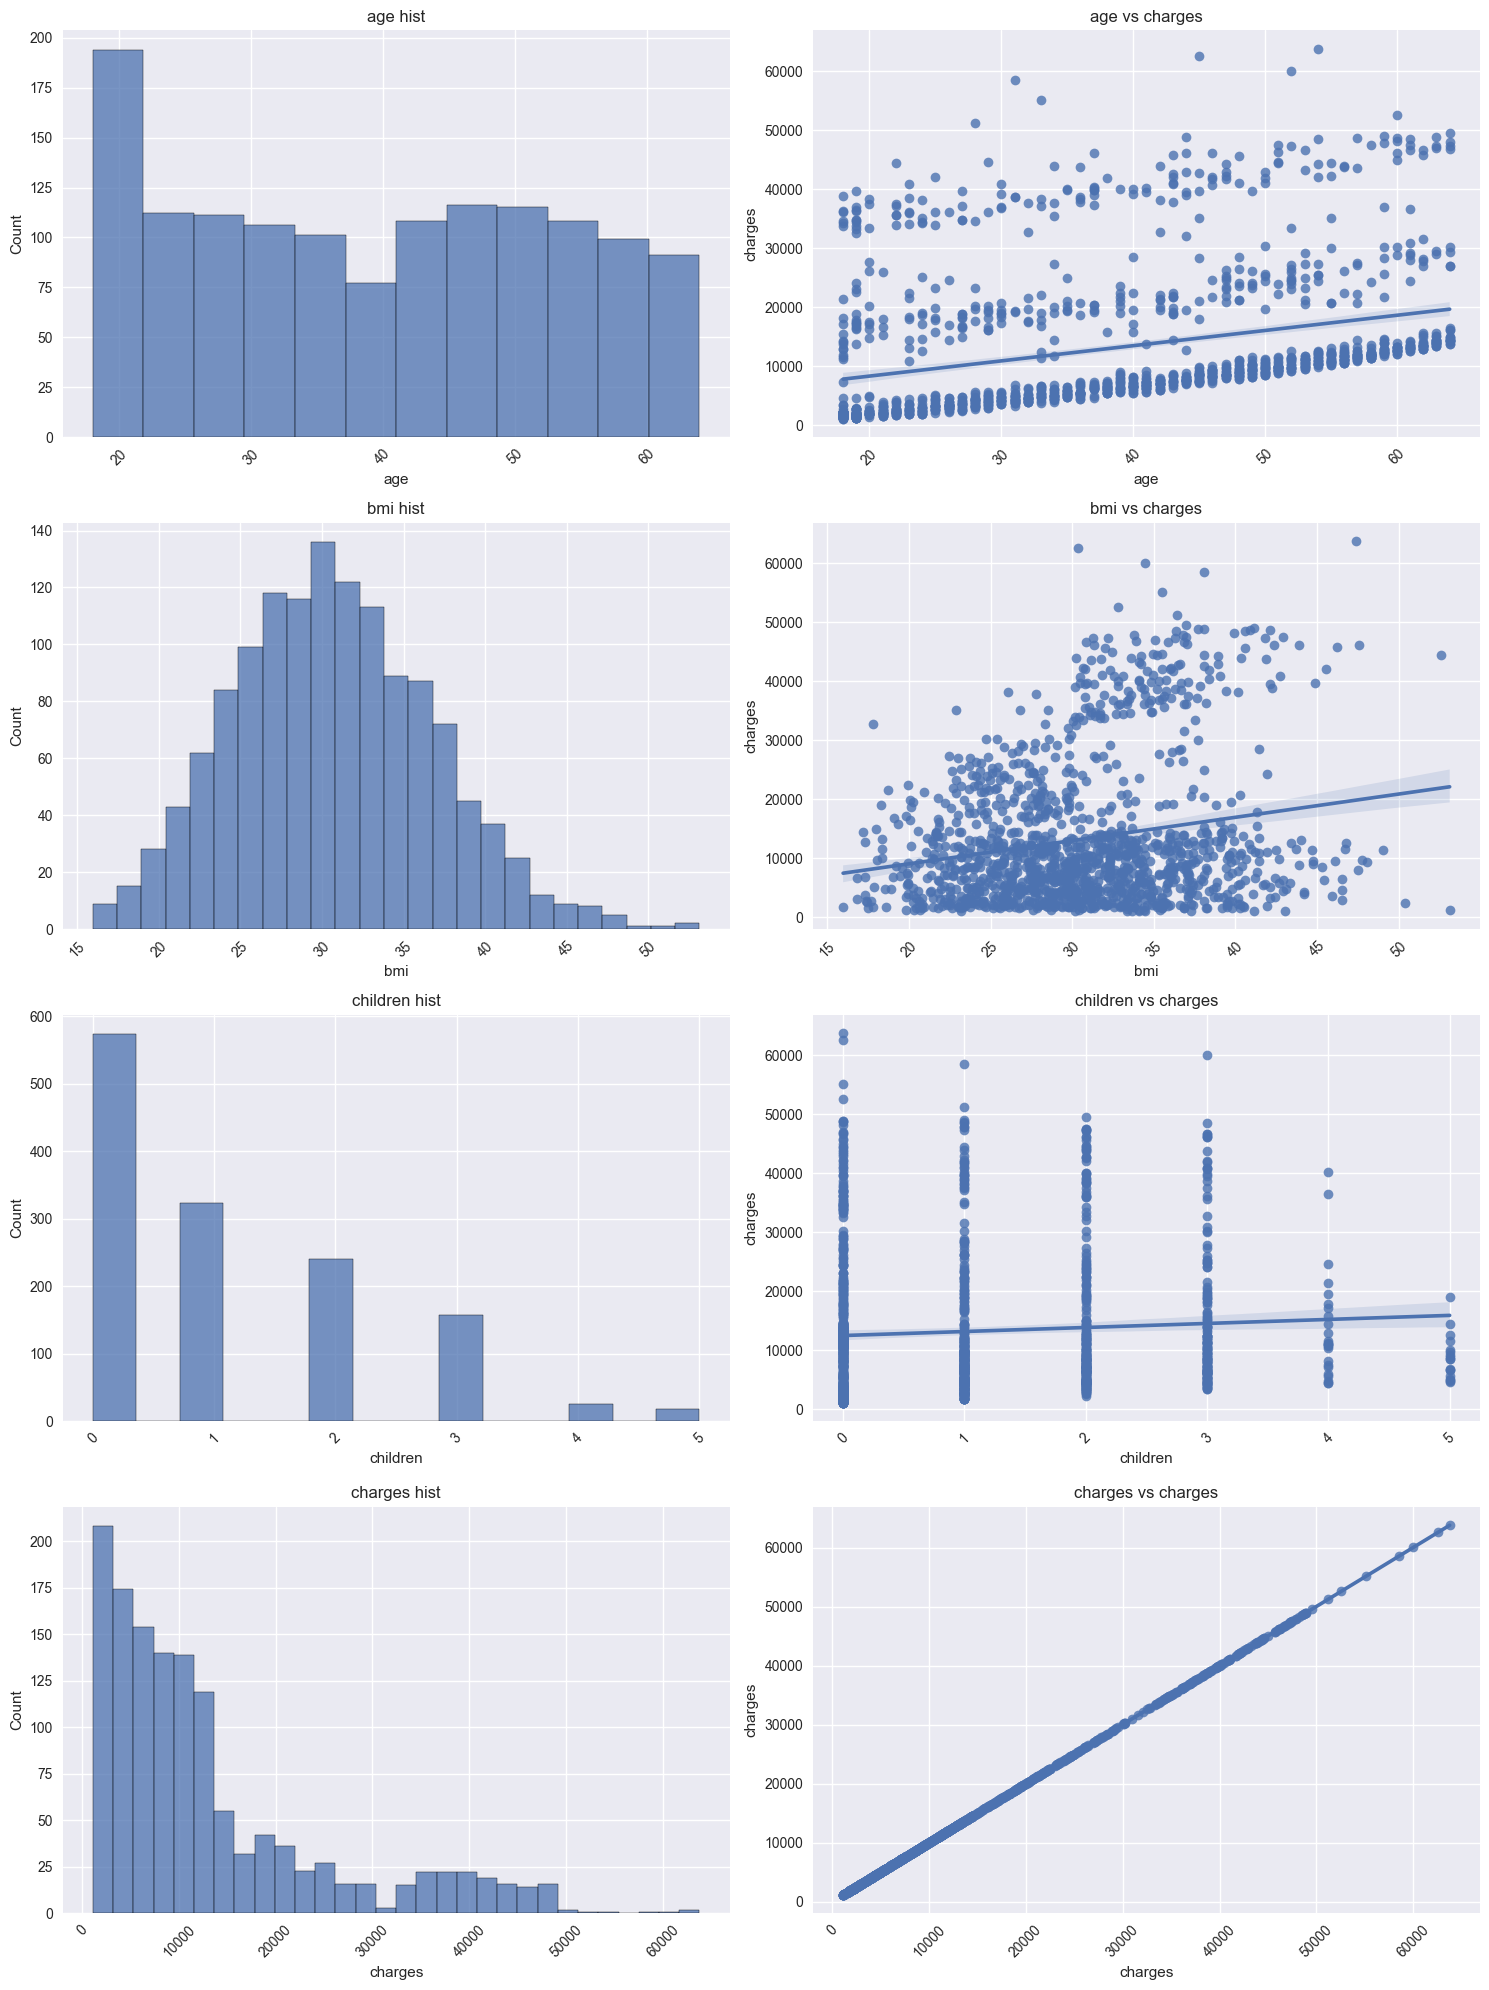

In [109]:
n = len(num_feature)
fig, axes = plt.subplots(n, 2, figsize=(15,20))

for i, feature in enumerate(num_feature):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    regplot.set_title(f'{feature} vs charges')
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()

---

Построим тепловую карту корреляции

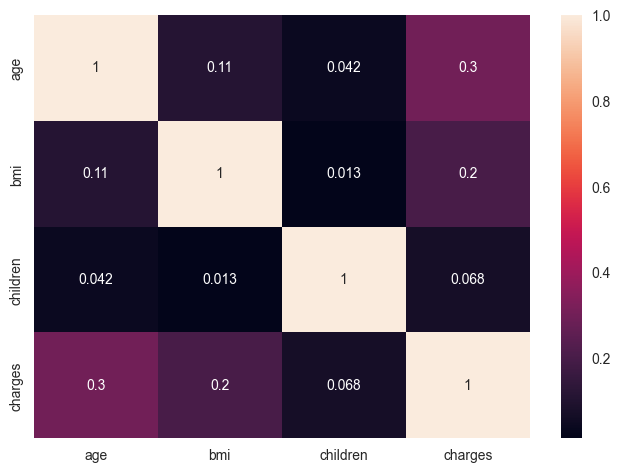

In [110]:
sns.heatmap(data=temp_data[num_feature].corr(), annot=True);

---

Построим боксплоты

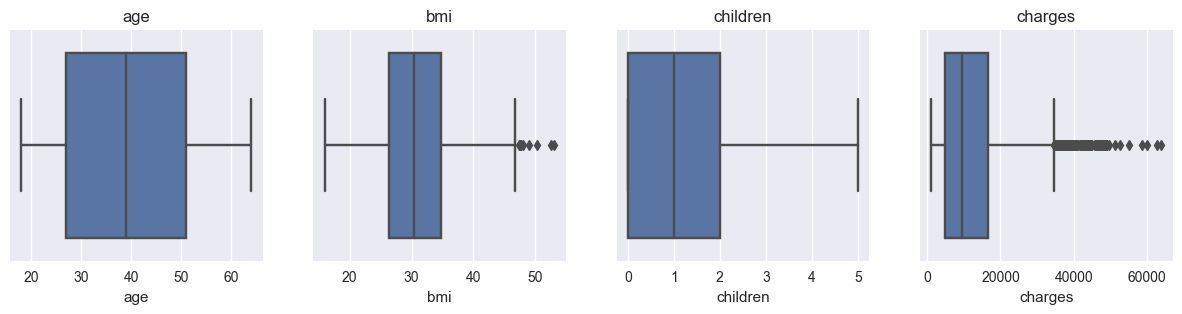

In [111]:
fig, axes = plt.subplots(1,n,figsize=(15,3))

for i, feature in enumerate(num_feature):
    boxplot = sns.boxplot(data=temp_data, x=feature, ax=axes[i])
    boxplot.set_title(f'{feature}')

### Преобразуем категориальные признаки sex and smoker в бинарные признаки

In [112]:
temp_data['sex'] = temp_data['sex'].apply(lambda x: 1 if x == 'male' else 0)
temp_data['smoker'] = temp_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
temp_data = pd.get_dummies(temp_data)

### Построим новые графики с учетом новых числовых признаков

In [113]:
types = temp_data.dtypes
num_feature = list(types[types != 'object'].index)
num_feature

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

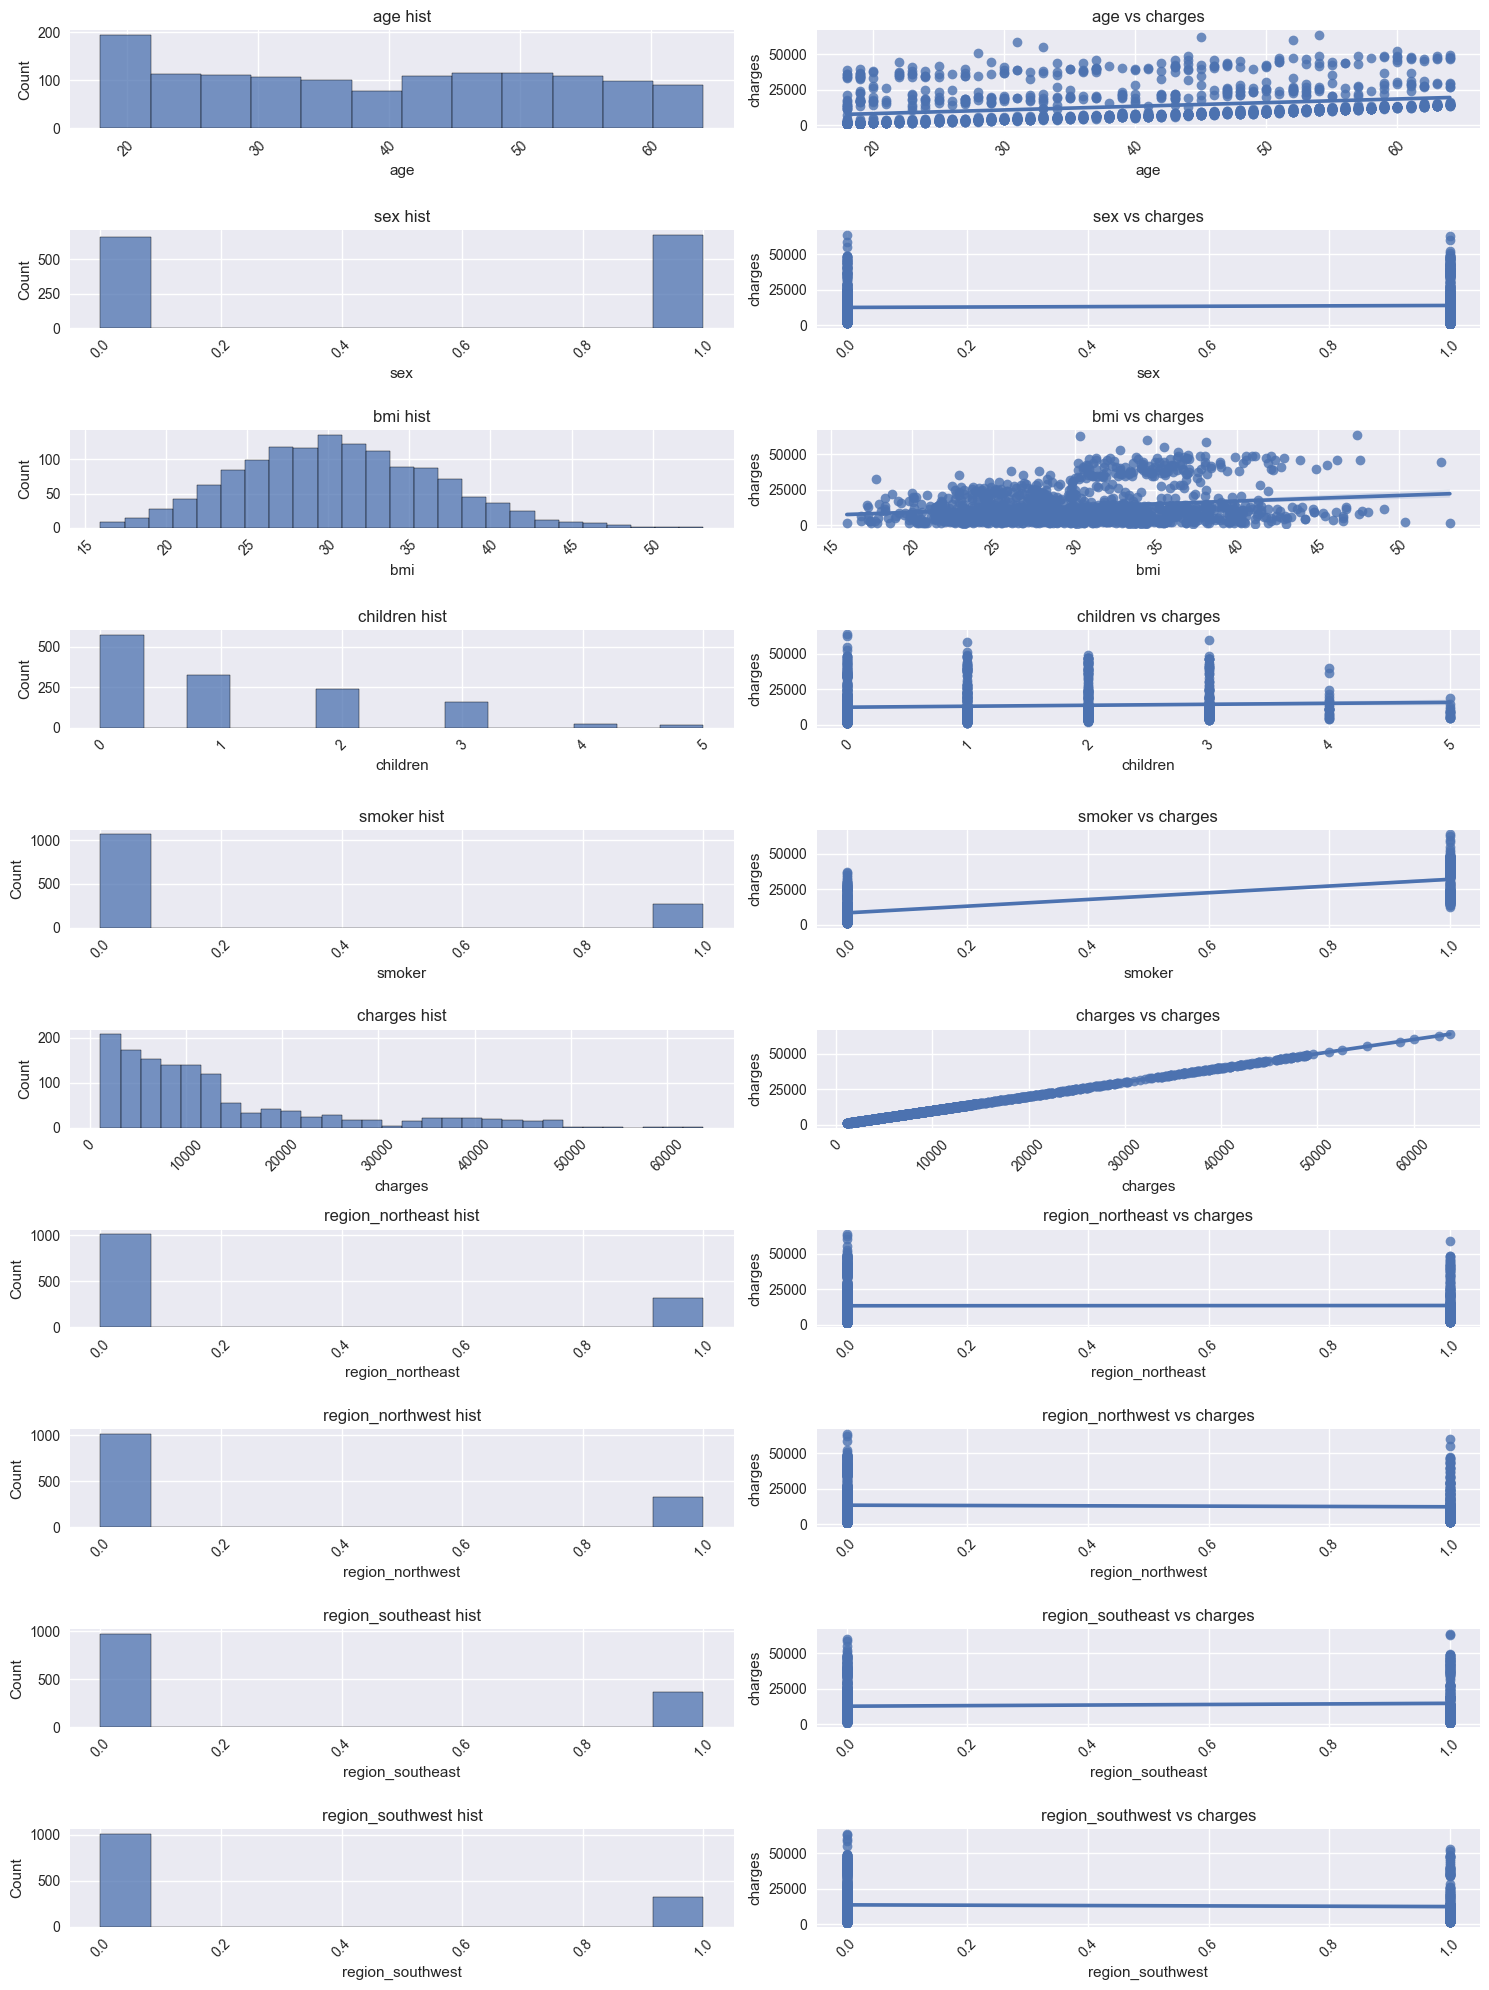

In [114]:
n = len(num_feature)
fig, axes = plt.subplots(n, 2, figsize=(15,20))

for i, feature in enumerate(num_feature):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)
    
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    regplot.set_title(f'{feature} vs charges')
    regplot.xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()

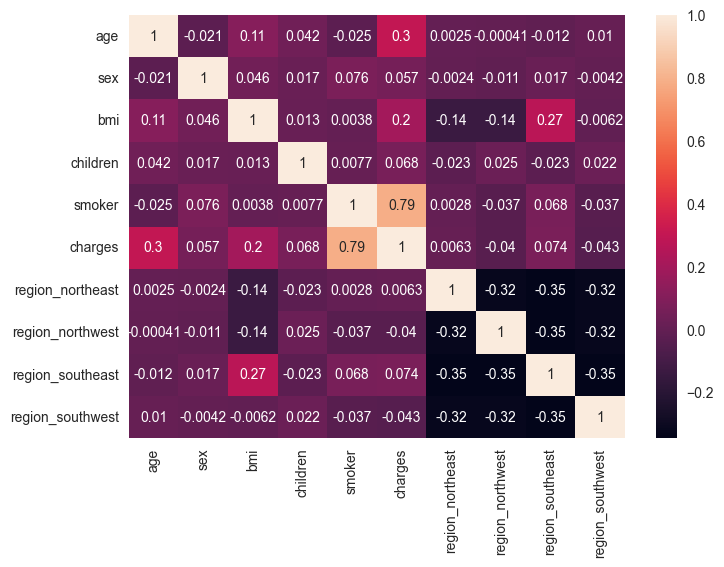

In [115]:
sns.heatmap(data=temp_data[num_feature].corr(), annot=True);

### Поймали зависимость

Как можно увидеть из тепловой карты, наиболее сильное воздействие на целевую переменную оказывает признак курения

---

### Моделируем

In [116]:
# Инициаоизируем функцию для отслеживания метрик
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {round(metrics.r2_score(y_train, y_train_predict),3)}')
    print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_predict),3)}')
    print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100,2)}')
    
    print('\n')
    
    print(f'Test R^2: {round(metrics.r2_score(y_test, y_test_predict),3)}')
    print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_predict),3)}')
    print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100,2)}')

In [117]:
features = temp_data.drop('charges', axis=1).columns
X, y = temp_data[features],temp_data['charges']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 9) (268, 9) (1070,) (268,)


In [119]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.intercept_.round(2)) # Ответ на задание 6.2
print_metrics(y_train, y_train_pred, y_test, y_test_pred) # Ответ на задание 6.3

-12390.8
Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.2


Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.89


''

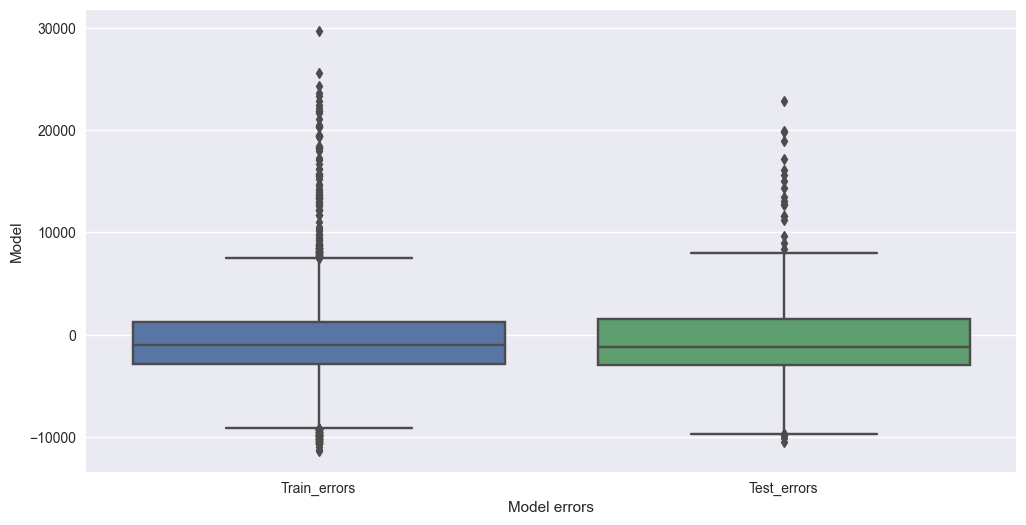

In [ ]:
# Визуализируем ошибки
fig, axes = plt.subplots(figsize=(12,6))
# Ошибки модели на тренировочной выборке
y_train_errors = y_train - y_train_pred
# Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
# Создаем df из ошибок
predict_df = pd.DataFrame({
    'Train_errors': y_train_errors,
    'Test_errors': y_test_errors
})
# Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax= axes)
axes.set_xlabel('Model errors')
axes.set_ylabel('Model')


---

### Нормализуем MinMaxScaller

In [121]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_test_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

X_train_scaled_poly.shape

(1070, 54)

### Обучаем на полиномиальных признаках

In [122]:
y_train_log = np.log(y_train) # необходимо логарифмировать таргет

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_pred_poly = lr_poly.predict(X_train_scaled_poly) # для возврата к размерности нужно взять экспоненту
y_test_pred_poly = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly)


Train R^2: 0.842
Train MAE: 2895.222
Train MAPE: 29.33


Test R^2: 0.867
Test MAE: 2737.077
Test MAPE: 30.2


In [123]:
lr_poly.coef_

array([-1.27472905e+16, -3.73468826e+16,  8.23454561e+14, -1.44817324e+15,
        6.36651483e+14, -4.45156865e+15, -4.19731280e+15,  1.74636086e+15,
       -4.34692526e+15,  8.30600000e+03,  7.95000000e+02,  1.01100000e+03,
       -1.68650000e+03,  1.68000000e+02,  1.27472905e+16,  1.27472905e+16,
        1.27472905e+16,  1.27472905e+16,  6.56692228e+16,  6.72937500e+02,
       -1.22300000e+03,  2.35250000e+02, -2.83223402e+16, -2.83223402e+16,
       -2.83223402e+16, -2.83223402e+16, -9.70817188e+03,  1.60067188e+03,
        5.48345312e+04, -8.23454561e+14, -8.23454561e+14, -8.23454561e+14,
       -8.23454561e+14, -2.11200000e+03, -2.23425000e+03,  1.44817324e+15,
        1.44817324e+15,  1.44817324e+15,  1.44817324e+15, -3.88535165e+14,
       -2.48116319e+14, -2.48116319e+14, -2.48116319e+14, -2.48116319e+14,
       -9.47092561e+14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.20134842e+15,  0.00000000e+00,  0.00000000e+00, -7.14502208e+15,
        0.00000000e+00, -

### Регуляризация L1

In [124]:
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_lasso_train = lasso_lr_poly.predict(X_train_scaled_poly)
y_lasso_test = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_lasso_train, y_test, y_lasso_test)

Train R^2: 0.842
Train MAE: 2890.473
Train MAPE: 29.4


Test R^2: 0.867
Test MAE: 2719.334
Test MAPE: 30.07


### Регуляризация L2

In [125]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_ridge_train = ridge_lr_poly.predict(X_train_scaled_poly)
y_ridge_test = ridge_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_ridge_train, y_test, y_ridge_test)

Train R^2: 0.839
Train MAE: 2948.804
Train MAPE: 29.55


Test R^2: 0.863
Test MAE: 2860.555
Test MAPE: 31.38
